In [155]:
using Plots,DataFrames,CSV,Dates,PrettyTables,FreqTables,Statistics,HTTP,JSON,JSON3

In [171]:
p = HTTP.get("https://api.covid19india.org/data.json");
j = JSON.Parser.parse(String(p.body));
j = j["cases_time_series"];
covid = vcat(DataFrame.(j)...);

In [172]:
show(covid,allcols=true,show_row_number = false)

402×8 DataFrame
 dailyconfirmed │ dailydeceased  dailyrecovered  date          dateymd     totalconfirmed  totaldeceased  totalrecovered 
 String         │ String         String          String        String      String          String         String         
────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────
 1              │ 0              0               30 January    2020-01-30  1               0              0
 0              │ 0              0               31 January    2020-01-31  1               0              0
 0              │ 0              0               01 February   2020-02-01  1               0              0
 1              │ 0              0               02 February   2020-02-02  2               0              0
 1              │ 0              0               03 February   2020-02-03  3               0              0
 0              │ 0              0               04 February   2020-02-04  3  

In [164]:
mon(x) = x[4:end]

mon (generic function with 1 method)

### Transforming column date to month to facilitate month-wise grouping 

In [173]:
transform!(covid,:date => ByRow(mon) => :month);

### Converting the columns in cols from string to int typed columns

In [174]:
cols = ["dailyconfirmed","dailydeceased","dailyrecovered"];
for c in cols
    covid[!,c] = parse.(Int,covid[!,c])
end

### Month-wise grouping of data followed by summing the values of columns in cols to yield the aggregate 


In [175]:
gTab = groupby(covid, :month);

In [197]:
println("\n")
pretty_table(combine(gTab,cols .=> sum .=> cols))



┌────────────┬────────────────┬───────────────┬────────────────┐
│      month │ dailyconfirmed │ dailydeceased │ dailyrecovered │
│     String │          Int64 │         Int64 │          Int64 │
├────────────┼────────────────┼───────────────┼────────────────┤
│   January  │         472318 │          5410 │         552275 │
│  February  │         353429 │          2766 │         350564 │
│     March  │         100173 │           645 │          82133 │
│     April  │          33231 │          1107 │           8909 │
│       May  │         155783 │          4252 │          82803 │
│      June  │         395146 │         12005 │         255978 │
│      July  │        1111273 │         19155 │         747698 │
│    August  │        1990885 │         28879 │        1741832 │
│ September  │        2622323 │         32677 │        2432623 │
│   October  │        1873041 │         23437 │        2219433 │
│  November  │        1279861 │         15509 │        1399002 │
│  December  │         

In [177]:
#First six values are assigned zero in the dataframe during moving average computation
rows = nrow(covid);
for c in cols
    col = "mov_avg_"*c[1]*c[6]
    covid[:,col] = zeros(rows)
    for i in 7:rows
        covid[i,col] = sum(covid[i-6:i,c])/7
    end
end

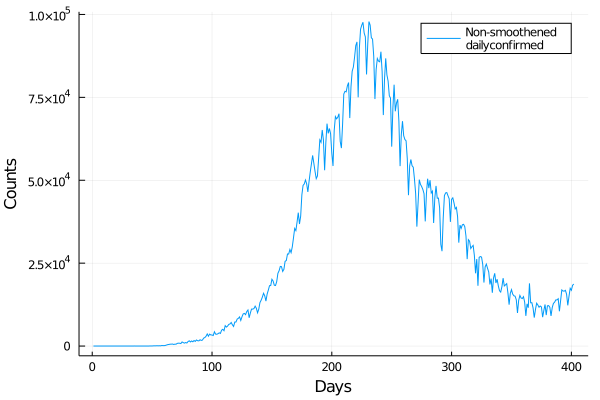

In [188]:
plot(1:rows,covid[:,:dailyconfirmed],label = "Non-smoothened \ndailyconfirmed",xlabel = "Days",ylabel = "Counts")

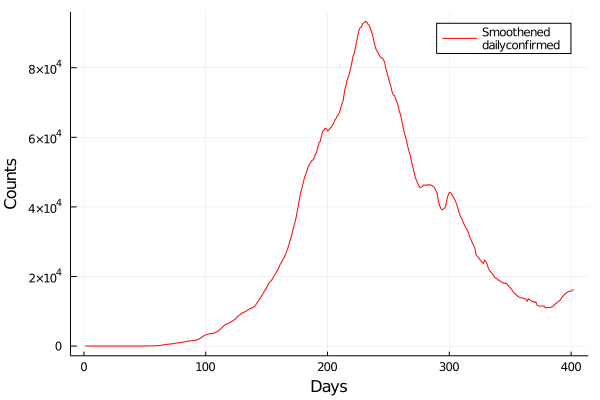

In [189]:
plot(1:rows,covid[:,:mov_avg_dc],label = "Smoothened \ndailyconfirmed",linecolor = "red",xlabel = "Days",ylabel = "Counts")

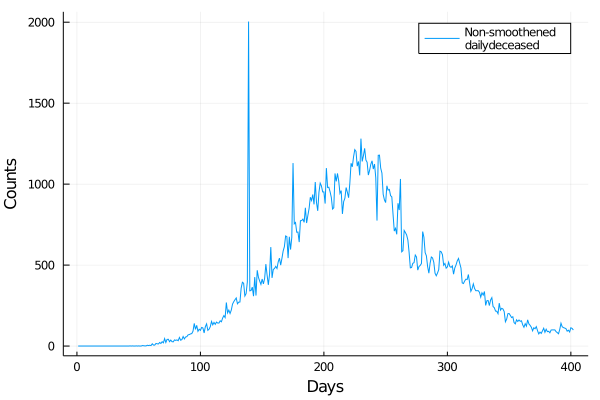

In [190]:
plot(1:rows,covid[:,:dailydeceased],label = "Non-smoothened \ndailydeceased",xlabel = "Days",ylabel = "Counts")

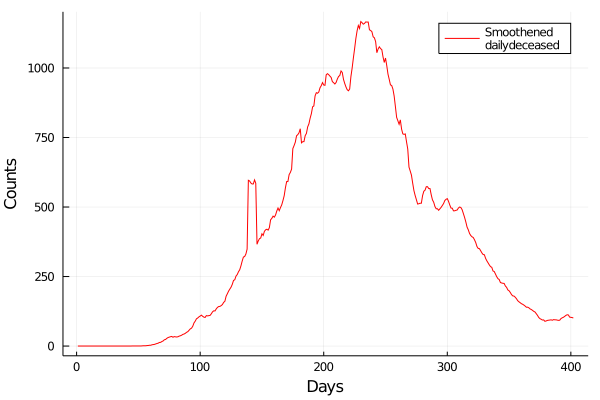

In [191]:
plot(1:rows,covid[:,:mov_avg_dd],label = "Smoothened \ndailydeceased",linecolor = "red",xlabel = "Days",ylabel = "Counts")

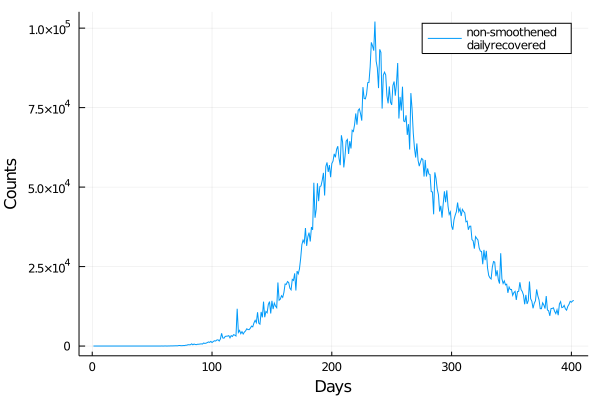

In [192]:
plot(1:rows,covid[:,:dailyrecovered],label = "non-smoothened \ndailyrecovered",xlabel = "Days",ylabel = "Counts")

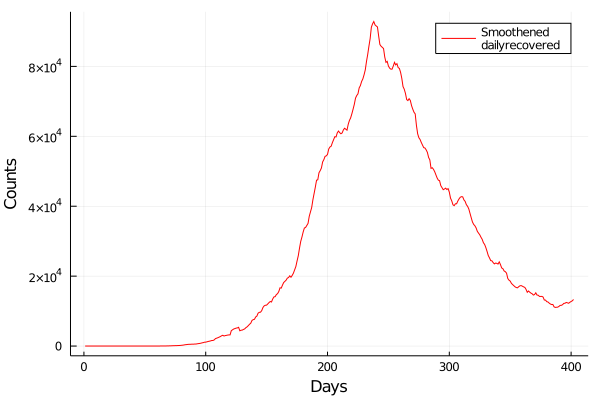

In [193]:
plot(1:rows,covid[:,:mov_avg_dr],label = "Smoothened \ndailyrecovered",linecolor = "red",xlabel = "Days",ylabel = "Counts")

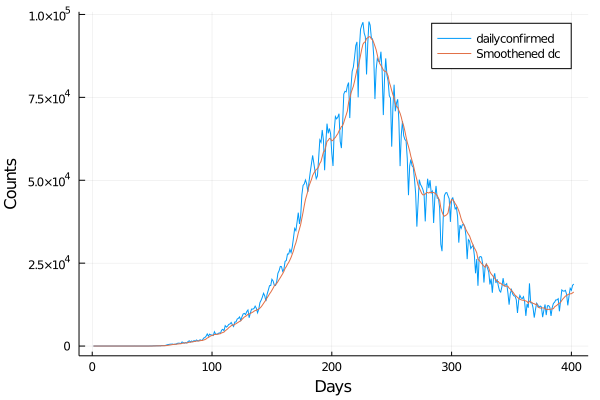

In [194]:
plot(1:rows,hcat(covid[:,:dailyconfirmed],covid[:,:mov_avg_dc]),label = ["dailyconfirmed" "Smoothened dc"],xlabel = "Days",ylabel = "Counts")

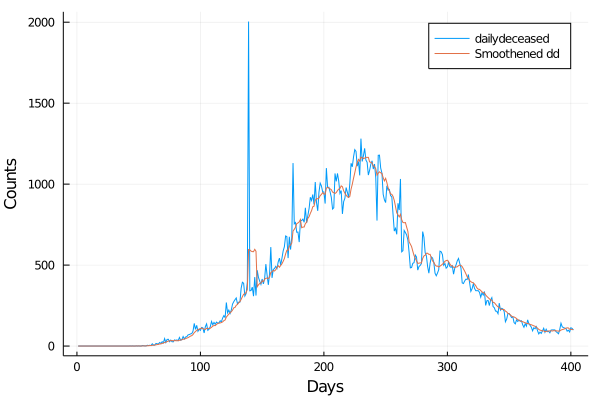

In [195]:
plot(1:rows,hcat(covid[:,:dailydeceased],covid[:,:mov_avg_dd]),label = ["dailydeceased" "Smoothened dd"],xlabel = "Days",ylabel = "Counts")

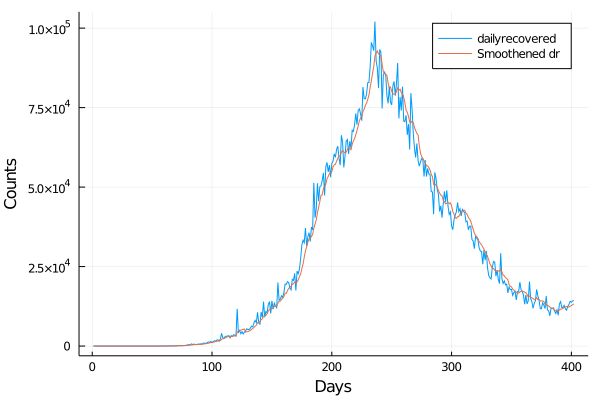

In [196]:
plot(1:rows,hcat(covid[:,:dailyrecovered],covid[:,:mov_avg_dr]),label = ["dailyrecovered" "Smoothened dr"],xlabel = "Days",ylabel = "Counts")